In [2]:
import rasterio
from rasterstats import zonal_stats
import geopandas as gpd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Processing Nighttime Lights

,LGA_CODE,LGA_CODE16,LGA_NAME,STATE_CODE,STATE_NAME,AREA_SQKM,geometry
0,LGA10050,10050,Albury (C),1,New South Wales,305.9459,"POLYGON ((146.81766 -36.06741, 146.82138 -36.0..."
1,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,"POLYGON ((152.40830 -30.48873, 152.40842 -30.4..."
2,LGA10250,10250,Ballina (A),1,New South Wales,484.9389,"MULTIPOLYGON (((153.43585 -29.00110, 153.43440..."
3,LGA10300,10300,Balranald (A),1,New South Wales,21690.6753,"POLYGON ((142.47043 -34.59135, 142.47228 -34.5..."
4,LGA10470,10470,Bathurst Regional (A),1,New South Wales,3817.8646,"POLYGON ((149.77197 -33.11585, 149.77153 -33.1..."


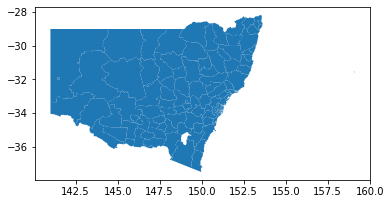

In [3]:
nsw_lga_bound = gpd.read_file('Data/shapefiles/NSW_LGA_2016.shp')
nsw_lga_bound.plot()
nsw_lga_bound.head()

In [4]:
nightlight_file = rasterio.open('Data/nightlights/AUS_nightlights_201706.tif')
nightlights = nightlight_file.read(1)

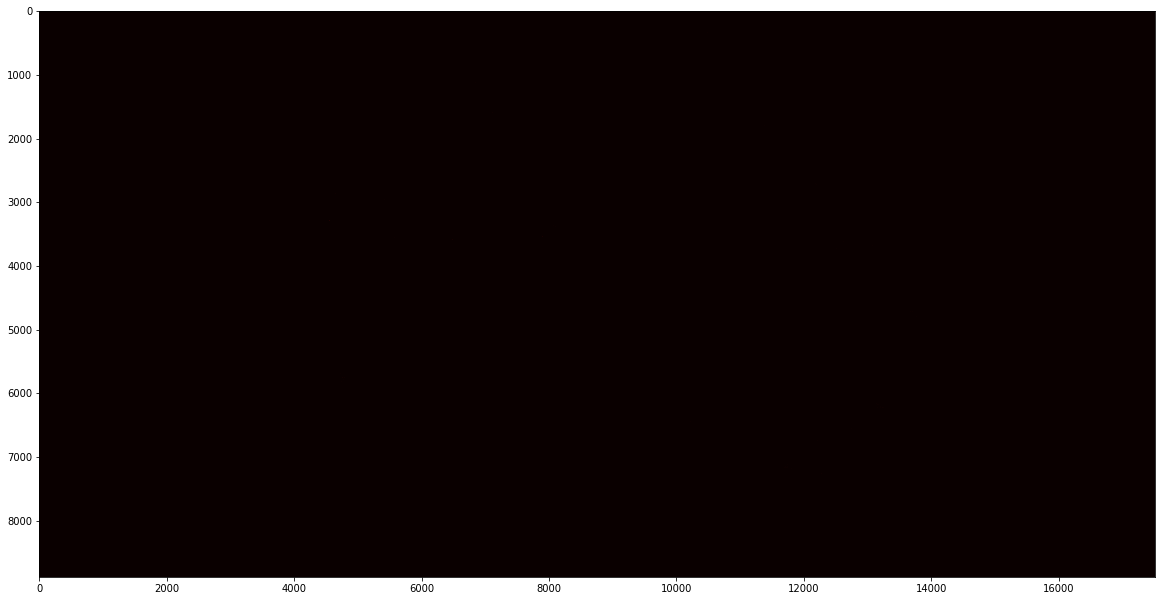

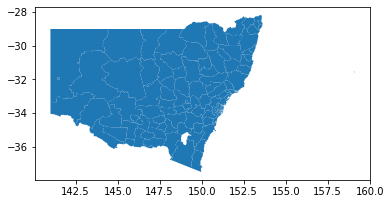

In [5]:
plt.figure(figsize=(20, 15))
plt.imshow(nightlights, cmap = 'hot')
nsw_lga_bound.plot()

In [6]:
stats_lga = zonal_stats(nsw_lga_bound, 'Data/nightlights/AUS_nightlights_201706.tif', nodata =  0,
                        stats = 'count min mean max sum', geojson_out = True)

In [7]:
lga_ntl = pd.DataFrame(columns = ['LGA_CODE', 'LGA_CODE16', 'LGA_NAME', 'STATE_CODE', 'STATE_NAME', 'AREA_SQKM',
                                  'count', 'min', 'mean', 'max', 'sum'])
for i in range(len(stats_lga)):
        orderedDictList = stats_lga[i]['properties']
        dummy = pd.DataFrame(orderedDictList, columns = orderedDictList.keys(), index = [0])
        lga_ntl = lga_ntl.append(dummy, ignore_index = True, sort = False)
lga_ntl.head()

In [9]:
stats_lga_2019 = zonal_stats(nsw_lga_bound, 'Data/nightlights/AUS_nightlights_201904.tif', nodata =  0,
                             stats = 'count min mean max sum', geojson_out = True)

In [10]:
lga_ntl_2019 = pd.DataFrame(columns = ['LGA_CODE', 'LGA_CODE16', 'LGA_NAME', 'STATE_CODE', 'STATE_NAME', 'AREA_SQKM',
                                       'count', 'min', 'mean', 'max', 'sum'])
for i in range(len(stats_lga_2019)):
        orderedDictList = stats_lga_2019[i]['properties']
        dummy = pd.DataFrame(orderedDictList, columns = orderedDictList.keys(), index = [0])
        lga_ntl_2019 = lga_ntl_2019.append(dummy, ignore_index = True, sort = False)
lga_ntl_2019 = lga_ntl_2019[['LGA_CODE', 'count', 'min', 'mean', 'max', 'sum']]
lga_ntl_2019.columns = ['LGA_CODE', 'ntl19_count', 'ntl19_min', 'ntl19_mean', 'ntl19_max', 'ntl19_sum']
lga_ntl_2019.head()

,LGA_CODE,ntl19_count,ntl19_min,ntl19_mean,ntl19_max,ntl19_sum
0,LGA10050,1766,0.20,2.501557,56.820000,4417.750000
1,LGA10130,46614,0.05,0.234065,41.060001,10910.721680
2,LGA10250,2576,0.13,0.650873,23.889999,1676.650024
3,LGA10300,121835,0.10,0.259825,10.840000,31655.767578
4,LGA10470,21325,0.08,0.371763,46.009998,7927.839844


## Processing Transportation

In [11]:
shapefile = gpd.read_file('Data/transportation/transpo_stations.shp')
dfsjoin = gpd.sjoin(nsw_lga_bound, shapefile)
dfpivot = pd.pivot_table(dfsjoin, index = 'LGA_CODE', columns = 'transporta', aggfunc = len)

In [12]:
dfsjoin.head()

,LGA_CODE,LGA_CODE16,LGA_NAME,STATE_CODE,STATE_NAME,AREA_SQKM,geometry,index_right,stop_id,stop_code,stop_name,stop_lat,stop_lon,location_t,parent_sta,wheelchair,platform_c,transporta
0,LGA10050,10050,Albury (C),1,New South Wales,305.9459,"POLYGON ((146.81766 -36.06741, 146.82138 -36.0...",30154,264060,264060,Palm Dr At East St,-36.08014112,146.940002,None,None,0,None,bus_stop
0,LGA10050,10050,Albury (C),1,New South Wales,305.9459,"POLYGON ((146.81766 -36.06741, 146.82138 -36.0...",26603,264071,264071,Mott St At Padman Dr,-36.08007479,146.89582,None,None,0,None,bus_stop
0,LGA10050,10050,Albury (C),1,New South Wales,305.9459,"POLYGON ((146.81766 -36.06741, 146.82138 -36.0...",18588,264026,264026,Hill St Near Doland St,-36.07955909,146.8937659,None,None,0,None,bus_stop
0,LGA10050,10050,Albury (C),1,New South Wales,305.9459,"POLYGON ((146.81766 -36.06741, 146.82138 -36.0...",30103,264040,264040,Padman Dr Near Southern View Dr,-36.0794207,146.8902676,None,None,0,None,bus_stop
0,LGA10050,10050,Albury (C),1,New South Wales,305.9459,"POLYGON ((146.81766 -36.06741, 146.82138 -36.0...",12920,264049,264049,Electra St At Chambers Av,-36.07809044,146.9323291,None,None,0,None,bus_stop


In [13]:
shapefile.head()

,stop_id,stop_code,stop_name,stop_lat,stop_lon,location_t,parent_sta,wheelchair,platform_c,transporta,geometry
0,2257201,2257201,1 Helmsman Bvd,-33.5007055,151.3509584,None,None,0,None,bus_stop,POINT (151.35096 -33.50071)
1,211075,211075,10 Barons Cres,-33.81977338,151.1400611,None,None,0,None,bus_stop,POINT (151.14006 -33.81977)
2,215949,215949,10 Bay Rd,-33.61506691,151.0737657,None,None,0,None,bus_stop,POINT (151.07377 -33.61507)
3,209393,209393,10 Beatrice St,-33.80815234,151.2560139,None,None,0,None,bus_stop,POINT (151.25601 -33.80815)
4,231885,231885,10 Fisher Rd,-32.72582573,151.8660694,None,None,0,None,bus_stop,POINT (151.86607 -32.72583)


In [14]:
transportation = dfpivot['stop_id'].reset_index()
transportation = transportation.fillna(0)
transportation['all_bus_stops'] = transportation.bus_stop + transportation.coach_stop
transportation['all_train_stations'] = transportation.light_rail + transportation.train_station
transportation['all_transpo'] = transportation.all_bus_stops + transportation.all_train_stations
transportation.head()
#drop('transporta', index = 1)

transporta,LGA_CODE,bus_stop,coach_stop,light_rail,train_station,wharf,all_bus_stops,all_train_stations,all_transpo
0,LGA10050,90.0,0.0,0.0,1.0,0.0,90.0,1.0,91.0
1,LGA10130,17.0,3.0,0.0,1.0,0.0,20.0,1.0,21.0
2,LGA10250,60.0,7.0,0.0,0.0,0.0,67.0,0.0,67.0
3,LGA10300,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0
4,LGA10470,136.0,6.0,0.0,1.0,0.0,142.0,1.0,143.0


## Merging the Two Datasets Together

In [15]:
dfpolynew = nsw_lga_bound.merge(transportation, how = 'left', on = 'LGA_CODE')
dfpolynew.head()

,LGA_CODE,LGA_CODE16,LGA_NAME,STATE_CODE,STATE_NAME,AREA_SQKM,geometry,bus_stop,coach_stop,light_rail,train_station,wharf,all_bus_stops,all_train_stations,all_transpo
0,LGA10050,10050,Albury (C),1,New South Wales,305.9459,"POLYGON ((146.81766 -36.06741, 146.82138 -36.0...",90.0,0.0,0.0,1.0,0.0,90.0,1.0,91.0
1,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,"POLYGON ((152.40830 -30.48873, 152.40842 -30.4...",17.0,3.0,0.0,1.0,0.0,20.0,1.0,21.0
2,LGA10250,10250,Ballina (A),1,New South Wales,484.9389,"MULTIPOLYGON (((153.43585 -29.00110, 153.43440...",60.0,7.0,0.0,0.0,0.0,67.0,0.0,67.0
3,LGA10300,10300,Balranald (A),1,New South Wales,21690.6753,"POLYGON ((142.47043 -34.59135, 142.47228 -34.5...",0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0
4,LGA10470,10470,Bathurst Regional (A),1,New South Wales,3817.8646,"POLYGON ((149.77197 -33.11585, 149.77153 -33.1...",136.0,6.0,0.0,1.0,0.0,142.0,1.0,143.0


In [16]:
df_transpo_ntl = dfpolynew.merge(lga_ntl[['LGA_CODE', 'count', 'min', 'mean', 'max', 'sum']], how = 'left', on = 'LGA_CODE')
df_transpo_ntl = df_transpo_ntl.merge(lga_ntl_2019, how = 'left', on = 'LGA_CODE')
df_transpo_ntl.columns

Index(['LGA_CODE', 'LGA_CODE16', 'LGA_NAME', 'STATE_CODE', 'STATE_NAME',
       'AREA_SQKM', 'geometry', 'bus_stop', 'coach_stop', 'light_rail',
       'train_station', 'wharf', 'all_bus_stops', 'all_train_stations',
       'all_transpo', 'count', 'min', 'mean', 'max', 'sum', 'ntl19_count',
       'ntl19_min', 'ntl19_mean', 'ntl19_max', 'ntl19_sum'],
      dtype='object')

In [17]:
cols = ['LGA_CODE', 'AREA_SQKM', 'bus_stop', 'coach_stop', 'light_rail', 'train_station', 'wharf',
        'all_bus_stops', 'all_train_stations', 'all_transpo', 'count', 'min', 'mean', 'max', 'sum',
        'ntl19_count', 'ntl19_min', 'ntl19_mean', 'ntl19_max', 'ntl19_sum']
new_cols = ['LGA_CODE', 'land_area', 'bus_stop', 'coach_stop', 'light_rail', 'train_station', 'wharf',
            'all_bus_stops', 'all_train_stations', 'all_transpo', 'ntl17_count', 'ntl17_min', 'ntl17_mean',
            'ntl17_max', 'ntl17_sum', 'ntl19_count', 'ntl19_min', 'ntl19_mean', 'ntl19_max', 'ntl19_sum']
df_final = df_transpo_ntl[cols]
df_final.columns = new_cols

In [18]:
df_final.head()

,LGA_CODE,land_area,bus_stop,coach_stop,light_rail,train_station,wharf,all_bus_stops,all_train_stations,all_transpo,ntl17_count,ntl17_min,ntl17_mean,ntl17_max,ntl17_sum,ntl19_count,ntl19_min,ntl19_mean,ntl19_max,ntl19_sum
0,LGA10050,305.9459,90.0,0.0,0.0,1.0,0.0,90.0,1.0,91.0,1766,0.14,2.375328,59.139999,4194.830078,1766,0.20,2.501557,56.820000,4417.750000
1,LGA10130,8620.6990,17.0,3.0,0.0,1.0,0.0,20.0,1.0,21.0,46613,-0.01,0.210830,34.509998,9827.399414,46614,0.05,0.234065,41.060001,10910.721680
2,LGA10250,484.9389,60.0,7.0,0.0,0.0,0.0,67.0,0.0,67.0,2576,0.09,0.619946,20.860001,1596.979980,2576,0.13,0.650873,23.889999,1676.650024
3,LGA10300,21690.6753,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,121835,0.07,0.201670,10.460000,24570.441406,121835,0.10,0.259825,10.840000,31655.767578
4,LGA10470,3817.8646,136.0,6.0,0.0,1.0,0.0,142.0,1.0,143.0,21325,0.06,0.334099,48.869999,7124.670410,21325,0.08,0.371763,46.009998,7927.839844


In [19]:
df_final.to_csv('Data/transpo_ntl.csv', index = False)

* https://automating-gis-processes.github.io/2016/Lesson7-overview.html